# Data Visualizations:
Upon cleaning up our data into  .csv file we imported our file into a new Jupyter Notebook and utilized Pandas and other different visualization tools to complete our analysis.

## Overview
Our goal was to address these questions through EDA in order to provide the best recommendations to Microsoft:
* Is it the right time for Microsoft enter the movie industry?
* What companies will Microsoft be competing against?
* What audience should we target to generate the most revenue?
* Which genres are currently the biggest box office draws? Budgeting?

**_Visualizations_** For our visualizations we utilized both _matplotlib_ and _seaborn_. Through a series of bar charts, line graphs, scatterplots, and regression charts we were able to provide data driven recommendations. 

### Import Packages

In [358]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
plt.style.use('seaborn')

### Import .csv into Pandas Data Frame

In [379]:
df = pd.read_csv('cleaned_final_movie_data.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Title,Domestic_Gross,Year,Rating,imdb_id,budget,genres,original_language,popularity,production_companies,...,release_date,revenue,runtime,vote_average,vote_count,main_production,main_production_country,main_genre,Foreign_Gross,Profit
0,Toy Story 4,434038008,2019,G,tt1979376,175000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",en,34.489,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",...,2019-06-19,1073394593,100,7.6,5029,'Walt Disney Pictures','United States of America','Adventure',639356585,898394593
1,The Lion King,422783777,1994,G,tt0110357,45000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",en,32.284,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",...,1994-05-07,987483777,89,8.3,12393,'Walt Disney Pictures','United States of America','Family',564700000,942483777
2,Toy Story 3,415004880,2010,G,tt0435761,200000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,27.214,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...",...,2010-06-16,1066969703,103,7.8,10168,'Pixar','United States of America','Animation',651964823,866969703
3,Finding Nemo,380843261,2003,G,tt0266543,94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,34.417,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...",...,2003-05-30,940335536,100,7.8,13547,'Pixar','United States of America','Animation',559492275,846335536
4,"Monsters, Inc.",289916256,2001,G,tt0198781,115000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,41.313,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...",...,2001-11-01,562816256,92,7.8,12668,'Pixar','United States of America','Animation',272900000,447816256


### Exploring the Movie Industry's Growth over the Years

In [380]:
yearly_gross = df.groupby('Year')['revenue'].sum().reset_index()[1:-1]
yearly_gross

# From our data set we calculated the total movie revenue since 1931 grouping by Year and summing the revenue

,Year,revenue
1,1931,19181
2,1936,8500000
3,1937,184925486
4,1939,433931426
5,1940,84300000
...,...,...
70,2015,25157970551
71,2016,25044057026
72,2017,26621482977
73,2018,24213349712


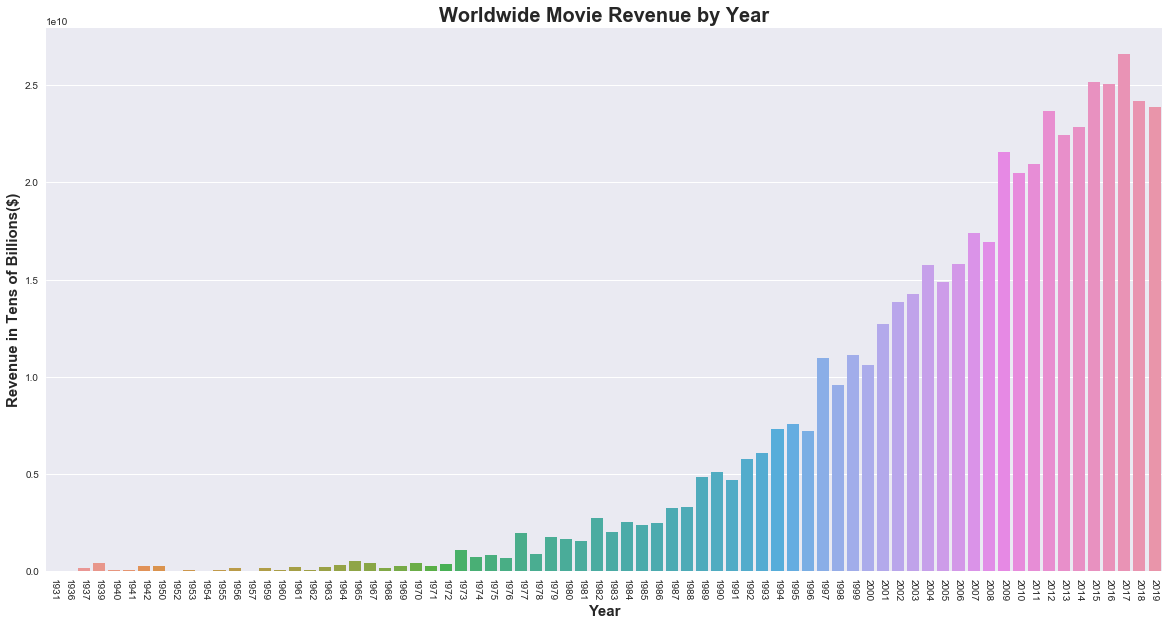

In [375]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(yearly_gross['Year'],yearly_gross['revenue'])

ax.set_title('Worldwide Movie Revenue by Year', fontweight='bold', fontsize=(20))
ax.set_xlabel('Year', fontweight='bold', fontsize=(15))
plt.xticks(rotation=-90)
ax.set_ylabel('Revenue in Tens of Billions($)', fontweight='bold', fontsize=(15));

# Created a bar chart to represent the total revenue growth Movies year by year.
# Note that this not reflect the entire movie industry only the 2700+ movies from our dataset 

### Exploring which Production Companies will be our Biggest Competitors

In [416]:
mpaa_comp = df.groupby('main_production')['revenue'].sum().sort_values(ascending = False)[:10].reset_index()
mpaa_comp

# Calculated top revenue generating movie studios of all time

,main_production,revenue
0,'Universal Pictures',29683226418
1,'Walt Disney Pictures',28245758737
2,'Paramount',25225359042
3,'Marvel Studios',22486468045
4,'Columbia Pictures',17124208668
5,'DreamWorks Animation',13278385335
6,'Pixar',12022814968
7,'Warner Bros. Pictures',11196671945
8,'New Line Cinema',10025599376
9,'Lucasfilm Ltd.',9661347157


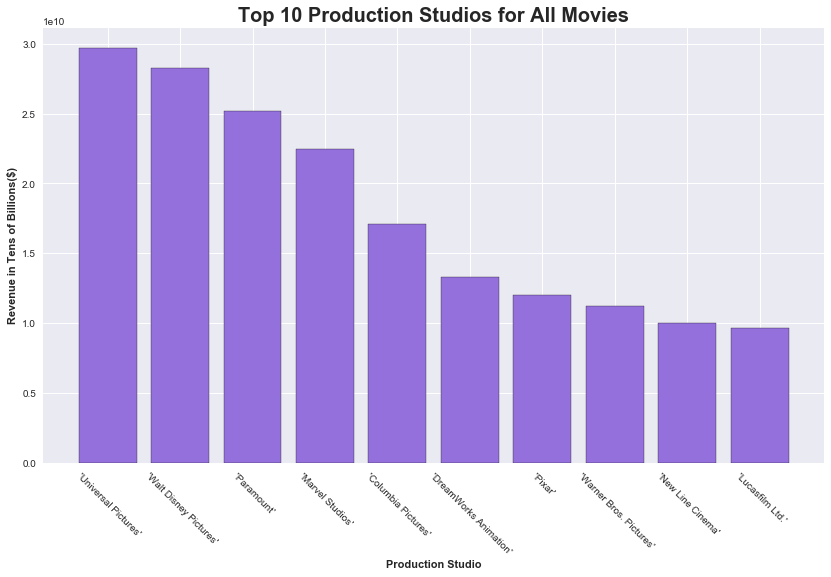

In [417]:
figure, ax = plt.subplots(figsize = (14,8))
plt.bar(mpaa_comp['main_production'],mpaa_comp['revenue'],color='mediumpurple',edgecolor='black')

ax.set_title('Top 10 Production Studios for All Movies', fontweight='bold', fontsize=(20))
ax.set_xlabel('Production Studio', fontweight='bold')
plt.xticks(rotation=-45)
ax.set_ylabel('Revenue in Tens of Billions($)', fontweight='bold');

# Created a bar chart to showcase the top 10 production studios of all time in all movies
# This chart helps us identify the big players in the movie inustry and who Microsoft will have to compete against

### Exploring Number of Movies by Rating

**Setting x and y for each Movie rating subplot**

In [390]:
y_g = df[(df['Rating']=='G') & (df['Year']>'1980')].groupby('Year')['Title'].count()
x_g = df[(df['Rating']=='G') & (df['Year']>'1980')].groupby('Year')['Title'].count().index

In [391]:
y_pg = df[(df['Rating']=='PG') & (df['Year']>'1980')].groupby('Year')['Title'].count()
x_pg = df[(df['Rating']=='PG') & (df['Year']>'1980')].groupby('Year')['Title'].count().index

In [392]:
y_thirt = df[(df['Rating']=='PG-13') & (df['Year']>'1980')].groupby('Year')['Title'].count()
x_thirt = df[(df['Rating']=='PG-13') & (df['Year']>'1980')].groupby('Year')['Title'].count().index

In [393]:
y_r = df[(df['Rating']=='R') & (df['Year']>'1980')].groupby('Year')['Title'].count()
x_r = df[(df['Rating']=='R') & (df['Year']>'1980')].groupby('Year')['Title'].count().index

**Converting strings to integers for x variables**

In [394]:
x_g = [int(i) for i in x_g]
x_pg = [int(i) for i in x_pg]
x_Xii = [int(i) for i in x_thirt]
x_r = [int(i) for i in x_r]

**Plotting Data**

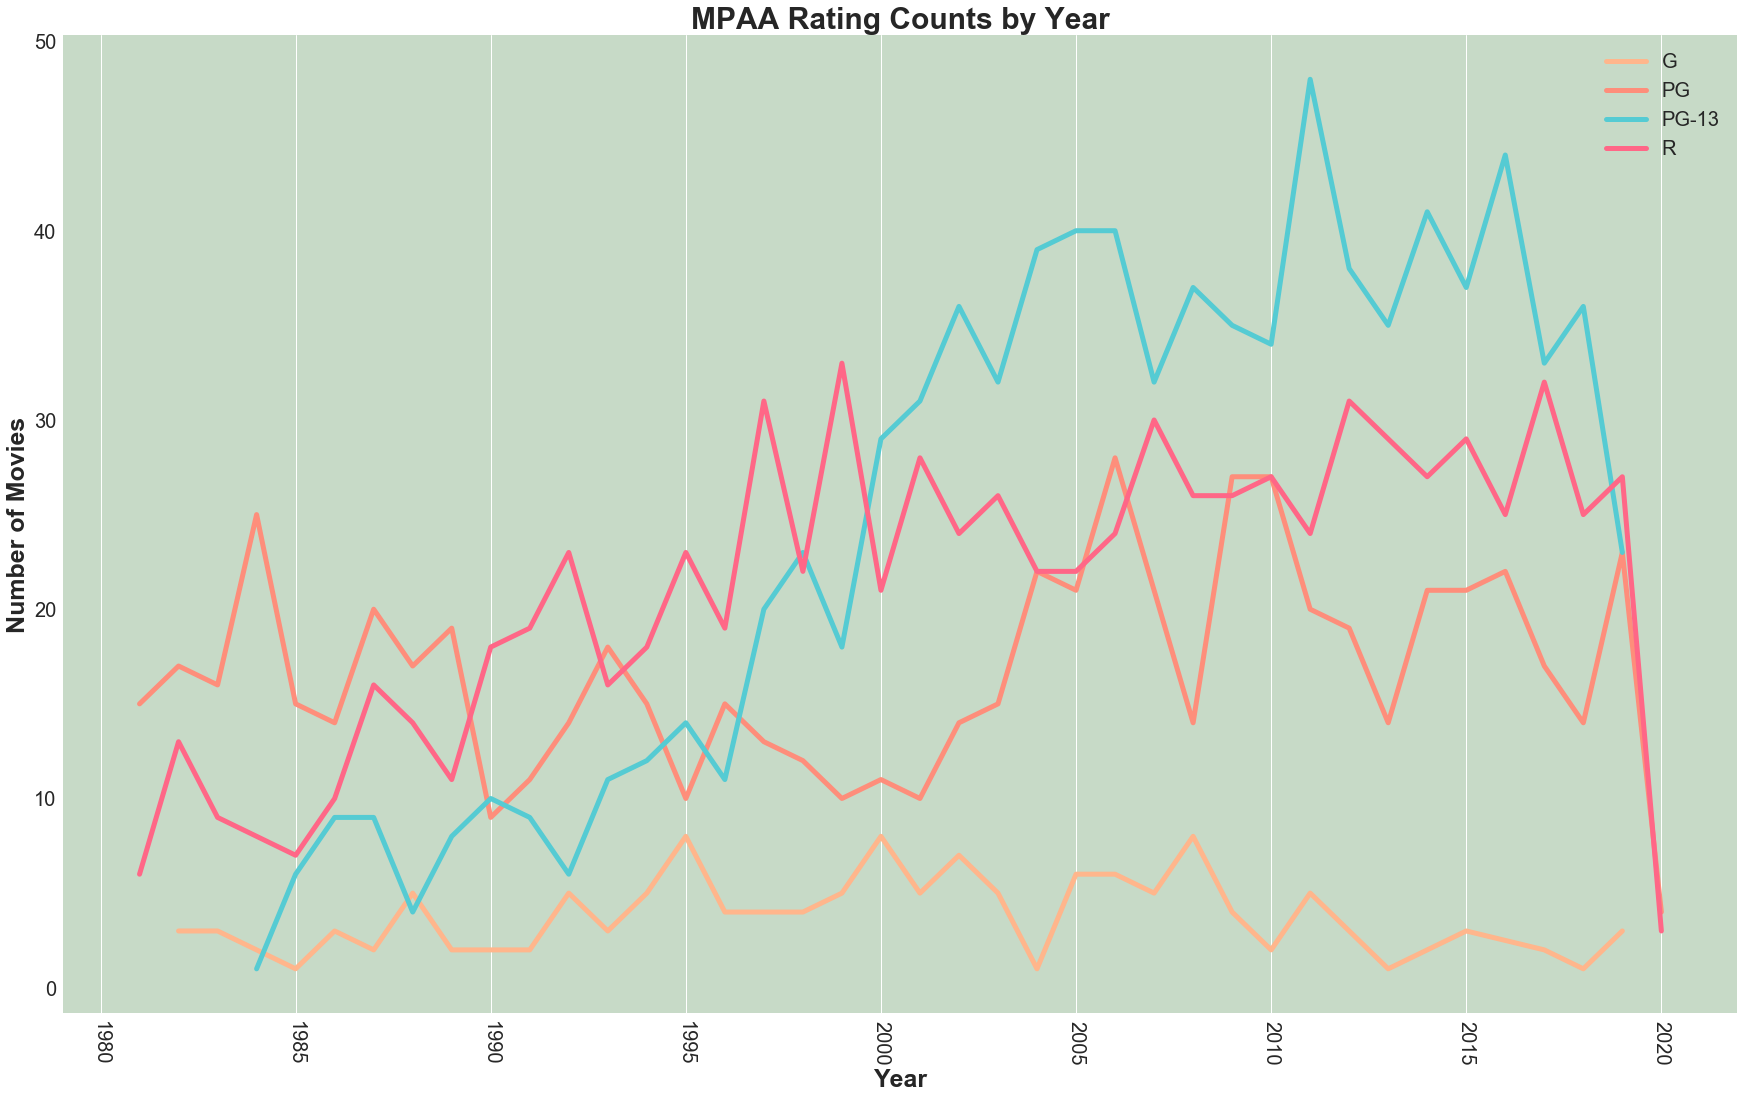

In [399]:
fig, ax = plt.subplots(figsize=(30,18))

#creating line graphs for each dataset
ax.plot(x_g, y_g, label='G', linewidth = 5, color='#FFB68C')
ax.plot(x_pg, y_pg, label='PG', linewidth = 5, color ='#FE8E7B')
ax.plot(x_Xii, y_thirt, label='PG-13', linewidth = 5, color ='#55CBD3')
ax.plot(x_r, y_r, label='R', linewidth = 5, color = '#FF6787')

#rotating x-axis ticks and making each axis font bigger
plt.xticks(rotation = -90)
ax.tick_params(axis='both', which='major', labelsize=20)

#setting title and axis labels
ax.set_title('MPAA Rating Counts by Year', fontsize = 30, fontweight='bold')
ax.set_ylabel('Number of Movies', fontsize = 25, fontweight='bold')
ax.set_xlabel('Year', fontsize = 25, fontweight='bold')

#setting background color, turning off x-axis grid, making legend font bigger
ax.grid(axis = 'y')
ax.set_facecolor('#C7DAC7')
ax.legend(fontsize = 20);

### Exploring Budget vs. Profitability for each Rating

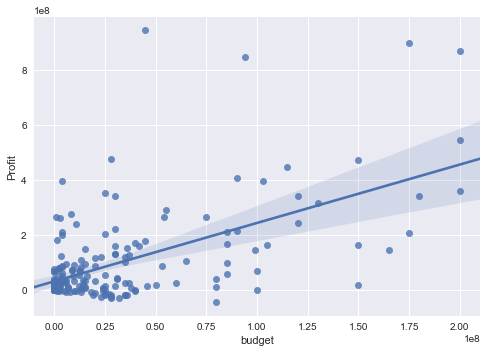

In [400]:
# budget vs. profitability for G movies
fig, ax = plt.subplots()
sns.regplot(df[df['Rating'] == 'G']['budget'], df[df['Rating'] == 'G']['Profit']);

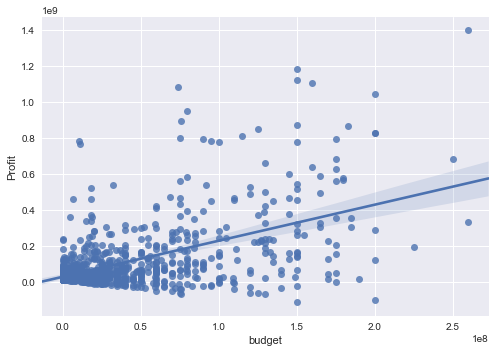

In [401]:
# budget vs. profitability for PG movies
fig, ax = plt.subplots()
sns.regplot(df[df['Rating'] == 'PG']['budget'], df[df['Rating'] == 'PG']['Profit']);

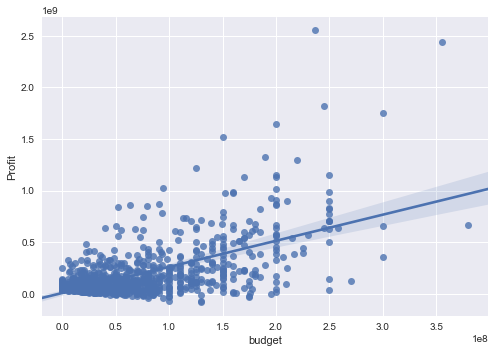

In [402]:
# budget vs. profitability for PG-13 movies
fig, ax = plt.subplots()
sns.regplot(df[df['Rating'] == 'PG-13']['budget'], df[df['Rating'] == 'PG-13']['Profit']);

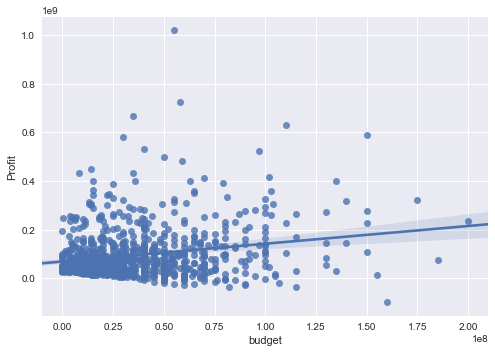

In [403]:
# budget vs. profitability for R movies
fig, ax = plt.subplots()
sns.regplot(df[df['Rating'] == 'R']['budget'], df[df['Rating'] == 'R']['Profit']);

We found that PG-13 movies seemed to be the most profitable but the data was not easily displayed in these graphs. Moved on to other data analysis to look more into it.

### Diving Deeper into different revenue numbers for each Rating

We tried to overlay all the previous data onto one graph but it was too cluttered to be of any value to us. It was not eye-catching at all.

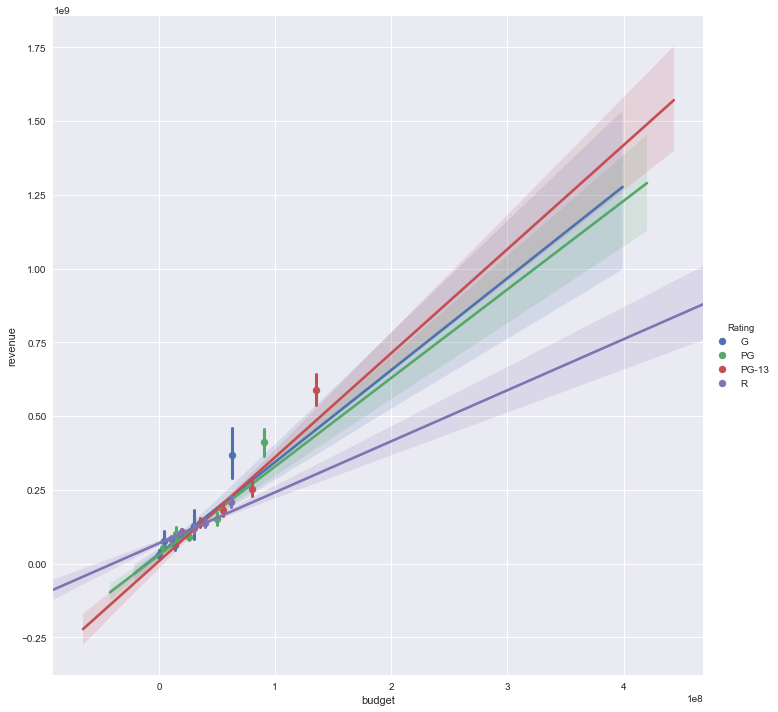

In [404]:
#plt.figure(figsize=(70,42))
sns.lmplot(x='budget', y = 'revenue', hue='Rating', data = df,x_bins = 5, height = 10, aspect = 1);

### Using different plot style to try and show what data represents

In [405]:
#sets colors to use for points in graph
colors = ['#FFB68C','#FE8E7B','#55CBD3','#FF6787']

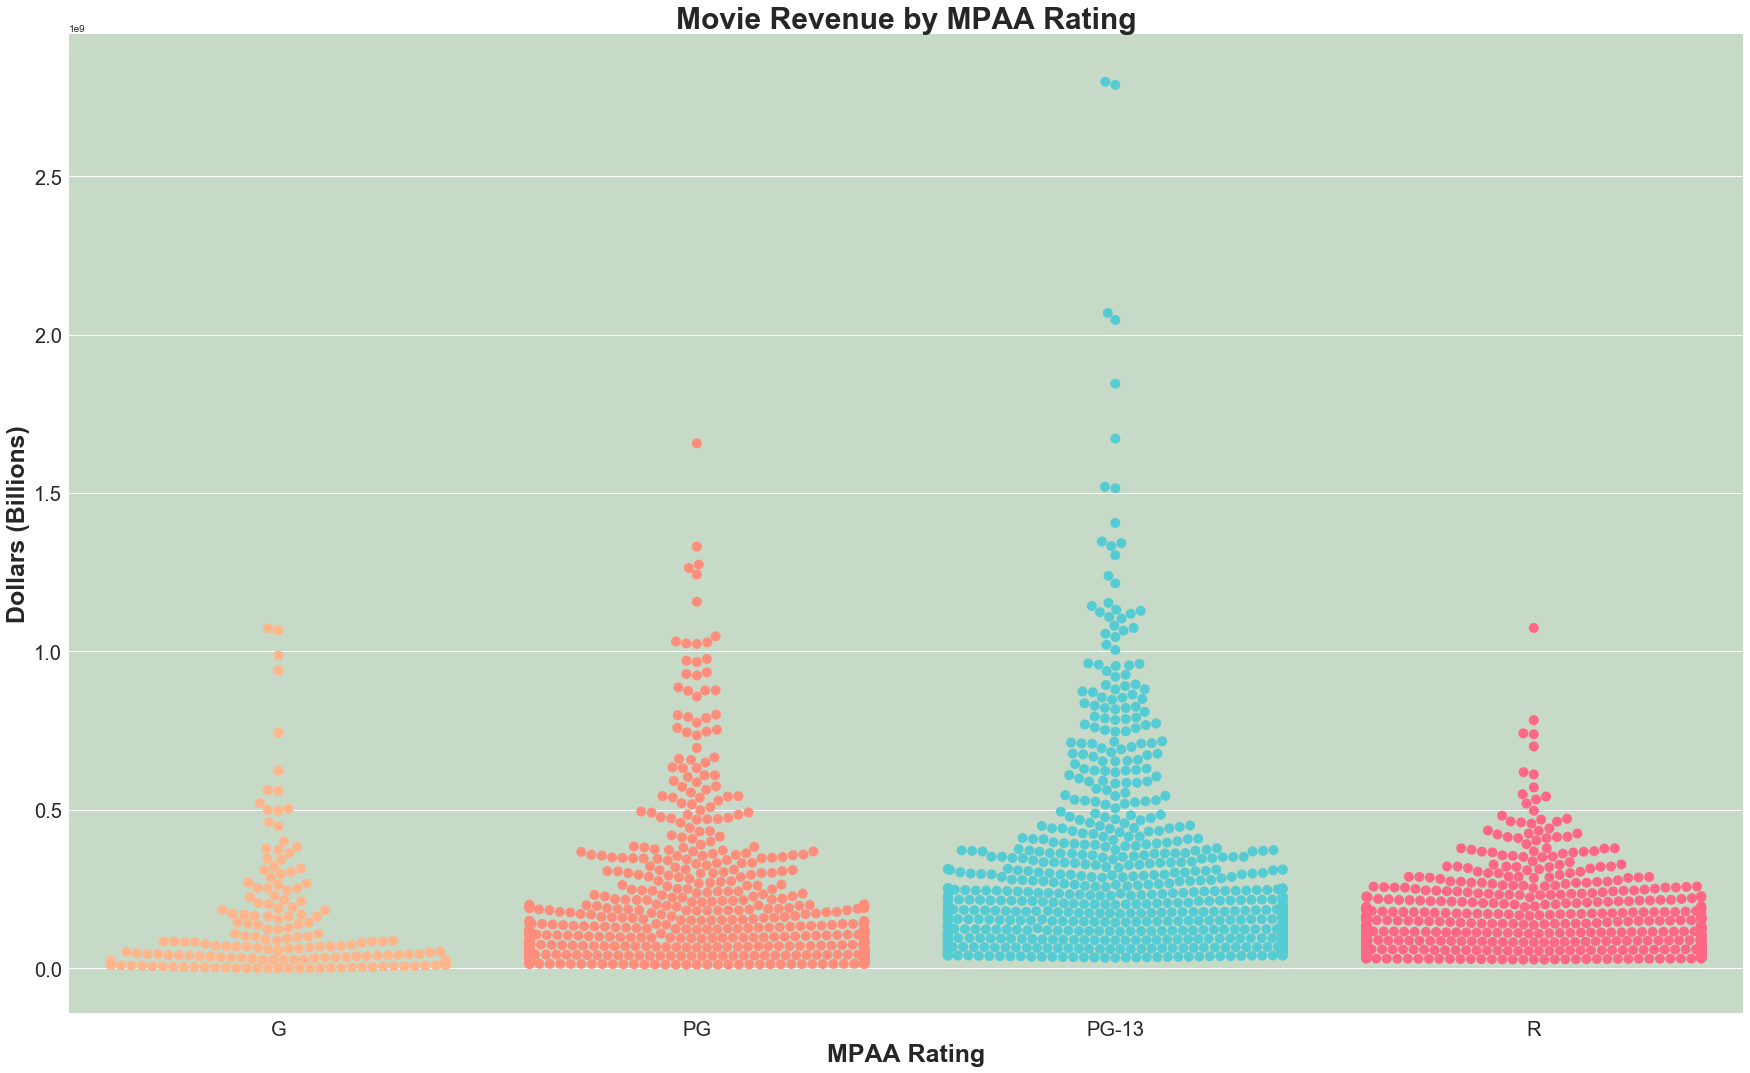

In [407]:
fig, ax = plt.subplots(figsize=(30,18))

#set tick size for eac axis and background color
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_facecolor('#C7DAC7')

#sets title for graph
ax.set_title('Movie Revenue by MPAA Rating', fontsize = 30, fontweight='bold')

#create a color palette for the dots using the colors list and plot data
sns.set_palette(colors)
sns.swarmplot(x='Rating', y='revenue', data=df, size = 10)

#set major axis labels and size
ax.set_ylabel('Dollars (Billions)', fontsize = 25, fontweight='bold')
ax.set_xlabel('MPAA Rating', fontsize = 25, fontweight='bold');

With this graph we were able to show that there are a higher number of movies generating more revenue in the PG-13 category than any other Rating. We should target this audience and analyze this category even further.

### Investigate if there is any replationship between budget, revenue, profit, and genre

Looking into this dataset, we removed the 'Animation' genre as it only had one movie in it. The movie performed very well at the box office and skewed the data to make it look like 'Animation' was the top performing genre.

In [408]:
df[(df['Rating']=='PG-13') & (df['main_genre']!=" 'Animation'")].groupby('main_genre').mean().sort_values(by = 'Profit', ascending=False)

,Domestic_Gross,budget,popularity,revenue,runtime,vote_average,vote_count,Foreign_Gross,Profit
main_genre,,,,,,,,,
'Adventure',1.730925e+08,1.200114e+08,22.253771,4.601233e+08,128.200000,6.652381,5685.714286,2.870308e+08,3.401118e+08
'Science Fiction',1.833034e+08,1.275063e+08,43.289125,4.538076e+08,121.968750,6.353125,6075.687500,2.705042e+08,3.263013e+08
'Action',1.445639e+08,1.096652e+08,21.680185,3.863752e+08,117.055794,6.322747,5087.012876,2.418113e+08,2.767100e+08
'Fantasy',1.291873e+08,8.128846e+07,21.160577,3.154055e+08,115.807692,6.561538,4739.807692,1.862182e+08,2.341170e+08
'History',1.107414e+08,6.500000e+07,20.933571,2.470653e+08,145.142857,7.342857,4189.857143,1.363239e+08,1.820653e+08
'Mystery',9.014596e+07,4.966667e+07,21.821889,2.096223e+08,111.333333,6.611111,3081.000000,1.194764e+08,1.599557e+08
'Thriller',8.400307e+07,5.670256e+07,18.372769,1.967744e+08,111.615385,6.366667,3163.333333,1.127713e+08,1.400718e+08
'War',9.235647e+07,8.375000e+07,22.434750,2.121196e+08,114.000000,6.475000,3831.750000,1.197631e+08,1.283696e+08
'Music',7.002948e+07,2.200000e+07,14.651750,1.471449e+08,98.750000,6.750000,1796.250000,7.711543e+07,1.251449e+08


In [409]:
# Setting y variables for graph
y_budget = df[(df['Rating']=='PG-13') & (df['main_genre']!=" 'Animation'")].groupby('main_genre').mean().sort_values(by = 'Profit', ascending=False)['budget']
y_profit = df[(df['Rating']=='PG-13') & (df['main_genre']!=" 'Animation'")].groupby('main_genre').mean().sort_values(by = 'Profit', ascending=False)['Profit']
y_revenue = df[(df['Rating']=='PG-13') & (df['main_genre']!=" 'Animation'")].groupby('main_genre').mean().sort_values(by = 'Profit', ascending=False)['revenue']

In [410]:
# Setting x variable and cleaning the strings to have a cleaner looking x label
x_bpr = df[(df['Rating']=='PG-13') & (df['main_genre']!=" 'Animation'")].groupby('main_genre').mean().sort_values(by = 'Profit', ascending=False).index

In [411]:
x_bpr = [i.replace("'","") for i in x_bpr]

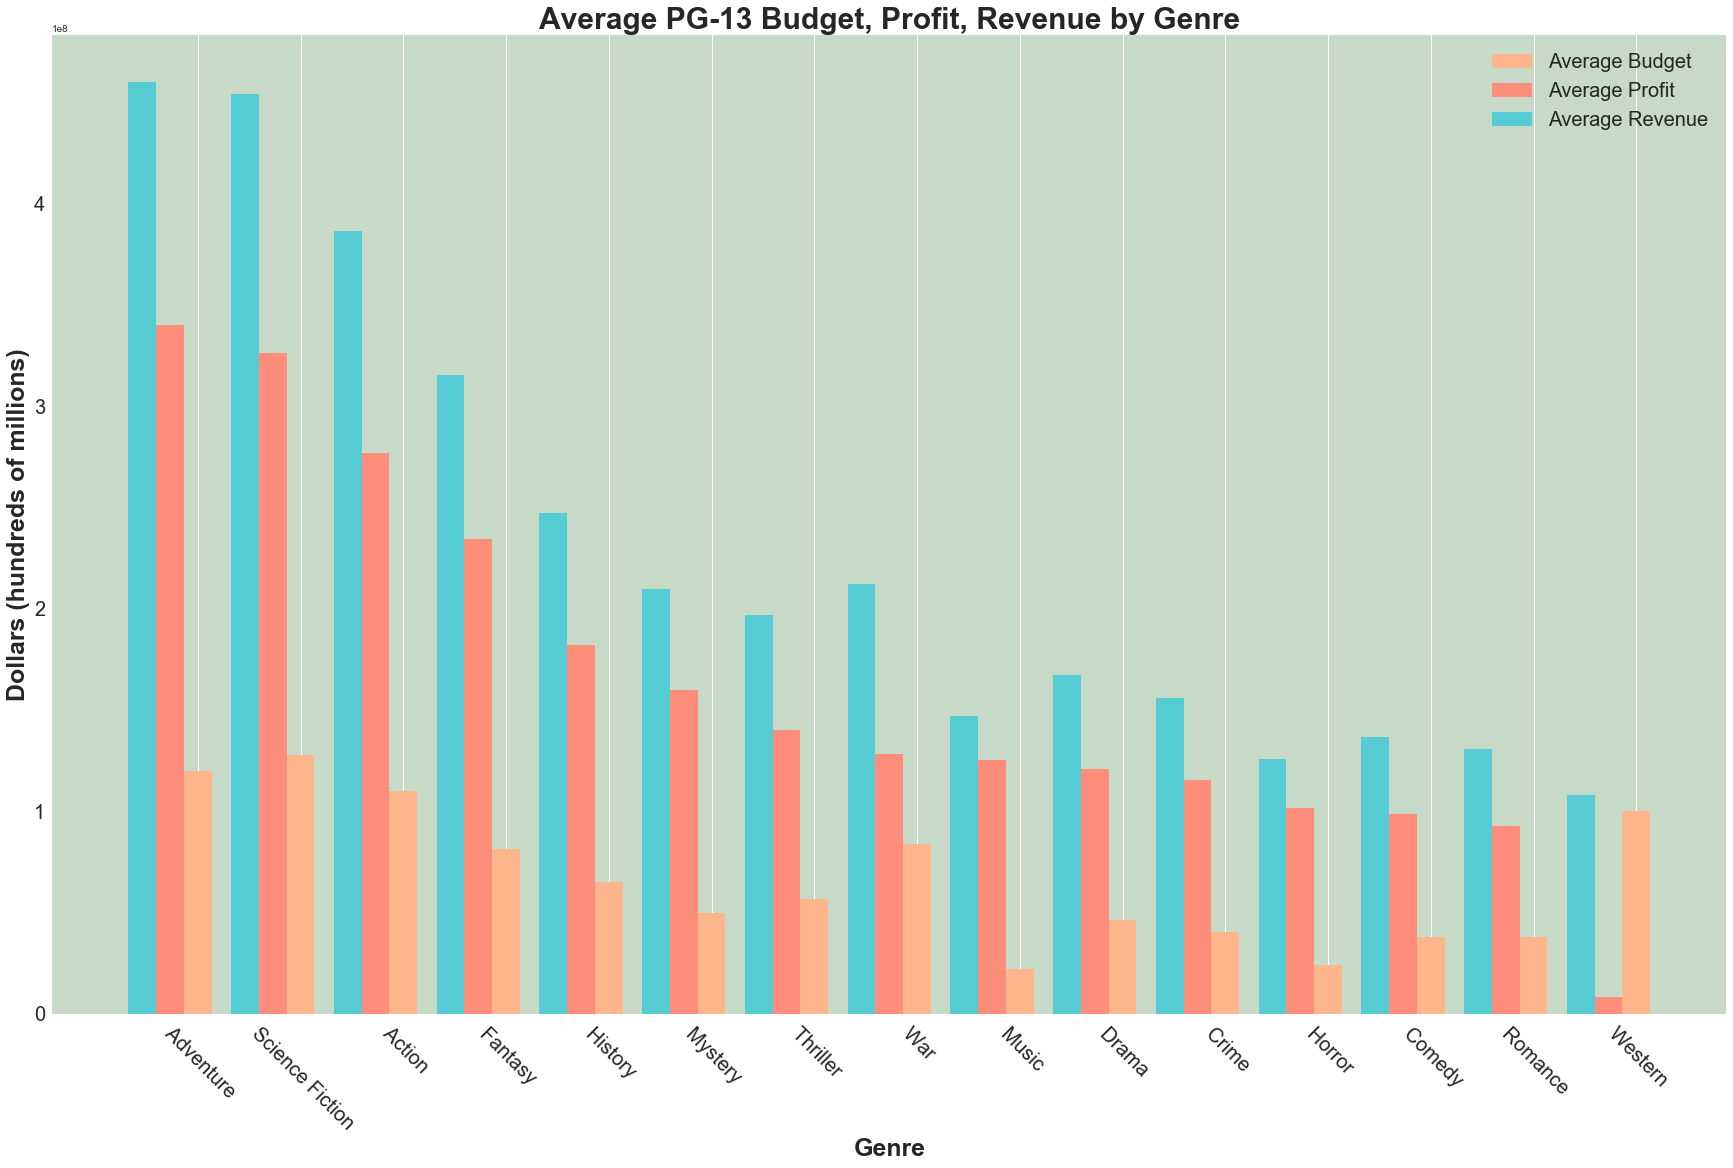

In [412]:
# Plotting data
fig, ax = plt.subplots(figsize=(30,18))
width = 0.27

#turn x variable data into np array so we can easily work with the width 
x_2 = np.arange(len(x_bpr))

#plotting data and moving each bar so all three can be displayed for each genre
ax.bar(x_2 + width, y_budget, label='Average Budget', width = width, linewidth = 5, color='#FFB68C')
ax.bar(x_2, y_profit, label='Average Profit', width = width, linewidth = 5, color ='#FE8E7B')
ax.bar(x_2 - width, y_revenue, label='Average Revenue', width = width, linewidth = 5, color ='#55CBD3')

#setting x-axis ticks and labels , rotating labels, and chingin font size
ax.set_xticks(x_2+width)
ax.set_xticklabels(x_bpr)
plt.xticks(rotation = -45)
ax.tick_params(axis='both', which='major', labelsize=20)

#Setting graph title, major axis labels, and other stylistc shoices
ax.set_title('Average PG-13 Budget, Profit, Revenue by Genre', fontsize = 30, fontweight='bold')
ax.set_ylabel('Dollars (hundreds of millions)', fontsize = 25, fontweight='bold')
ax.set_xlabel('Genre', fontsize = 25, fontweight='bold')
ax.grid(axis = 'y')
ax.set_facecolor('#C7DAC7')
ax.legend(fontsize = 20);

### Exploring the PG-13 Rating Further

In [385]:
mpaa_pg13 = df[df['Rating'] == 'PG-13']
mpaa_pg13_top = mpaa_pg13.groupby('main_production')['revenue','Profit'].sum().sort_values(by = 'revenue',ascending = False).reset_index()[0:10]
mpaa_pg13_top['%_Profit'] = round(mpaa_pg13_top['Profit']/mpaa_pg13_top['revenue'],2)
mpaa_pg13_top

#By subsetting for PG-13 Movies we were able to utilize groupby to find which movie studios generated the highest revenues


,main_production,revenue,Profit,%_Profit
0,'Marvel Studios',22486468045,18118468045,0.81
1,'Universal Pictures',14285178740,10225978740,0.72
2,'Paramount',14196856566,10542856566,0.74
3,'Columbia Pictures',9190314333,5916114333,0.64
4,'Warner Bros. Pictures',7827155123,6053155123,0.77
5,'New Line Cinema',6990879390,5542379390,0.79
6,'Lucasfilm Ltd.',5230230966,4111230966,0.79
7,'Legendary Entertainment',4898712148,3241712148,0.66
8,'Dune Entertainment',4755230091,4004230091,0.84
9,'DC Comics',4146208063,2856208063,0.69


In [386]:
mpaa_pg13 = df[df['Rating'] == 'PG-13']
mpaa_pg13_genre = mpaa_pg13.groupby('main_genre')['revenue','Profit'].sum().sort_values(by = 'revenue',ascending = False).reset_index()[0:10]
mpaa_pg13_genre['%_Profit'] = round(mpaa_pg13_genre['Profit']/mpaa_pg13_genre['revenue'],2)
mpaa_pg13_genre = mpaa_pg13_genre.sort_values(by = '%_Profit',ascending = False)
mpaa_pg13_genre

# For PG-13 Movies we utilized groupby to find which genre had the highest profitability%

,main_genre,revenue,Profit,%_Profit
7,'Horror',3650631040,2950531040,0.81
1,'Adventure',48312942592,35711742592,0.74
5,'Fantasy',8200542674,6087042674,0.74
9,'Crime',2492543746,1845343746,0.74
0,'Action',90025425032,64473425032,0.72
2,'Comedy',28664652964,20719852964,0.72
3,'Drama',25210094111,18241494111,0.72
4,'Science Fiction',14521843061,10441643058,0.72
6,'Thriller',7674201245,5462801245,0.71
8,'Romance',3262497305,2318997305,0.71


In [387]:
mpaa_pg13 = df[df['Rating'] == 'PG-13']
mpaa_pg13_2 = mpaa_pg13[mpaa_pg13['main_genre'] == " 'Action'"]
mpaa_pg13_action = mpaa_pg13_2.groupby('Title')['revenue','Profit'].sum().sort_values(by = 'revenue',ascending = False).reset_index()[0:10]
mpaa_pg13_action['%_Profit'] = round(mpaa_pg13_action['Profit']/mpaa_pg13_action['revenue'],2)
mpaa_pg13_action

# We determined in the earlier chart Action movies generated the highest amount of revenue
# Therefore we dove into the Action genre even further to look at the top 10 PG-13 Action movies of all time
# From this data we could recommend to Microsoft the directors and actors of these films to help them create the most successful blockbuster films

,Title,revenue,Profit,%_Profit
0,Avatar,2787965087,2550965087,0.91
1,Star Wars: Episode VII - The Force Awakens,2068223624,1823223624,0.88
2,Jurassic World,1671713208,1521713208,0.91
3,Furious 7,1515047671,1325047671,0.87
4,Avengers: Age of Ultron,1405403694,1155403694,0.82
5,Black Panther,1346739107,1146739107,0.85
6,Jurassic World: Fallen Kingdom,1303459585,1133459585,0.87
7,The Fate of the Furious,1238764765,988764765,0.80
8,Iron Man 3,1214811252,1014811252,0.84
9,Aquaman,1143689193,983689193,0.86


In [388]:
mpaa_pg13 = df[df['Rating'] == 'PG-13']
mpaa_pg13_3 = mpaa_pg13[mpaa_pg13['main_genre'] == " 'Horror'"]
mpaa_pg13_horror = mpaa_pg13_3.groupby('Title')['revenue','Profit'].sum().sort_values(by = 'revenue',ascending = False).reset_index()[0:10]
mpaa_pg13_horror['%_Profit'] = round(mpaa_pg13_horror['Profit']/mpaa_pg13_horror['revenue'],2)
mpaa_pg13_horror = mpaa_pg13_horror.sort_values(by = '%_Profit', ascending = False)
mpaa_pg13_horror

# We determined in the earlier charts Horror movies had the highest profitability %
# Therefore we dove into the Horror genre even further to look at the top 10 PG-13 Horror movies of all time
# If Microsoft wanted to focus solely on generating high profit margins we would recommend the directors and actors from these films


,Title,revenue,Profit,%_Profit
2,Split,278454358,269454358,0.97
8,Happy Death Day,122637878,117837878,0.96
0,A Quiet Place,340677200,323677200,0.95
6,The Grudge,183474602,173474602,0.95
5,The Others,209947037,192947037,0.92
7,Mama,146497771,131497771,0.90
9,The Shallows,119100758,102100758,0.86
3,The Ring,249348933,201348933,0.81
4,Dracula Untold,217124280,147124280,0.68
1,Van Helsing,300257475,140257475,0.47


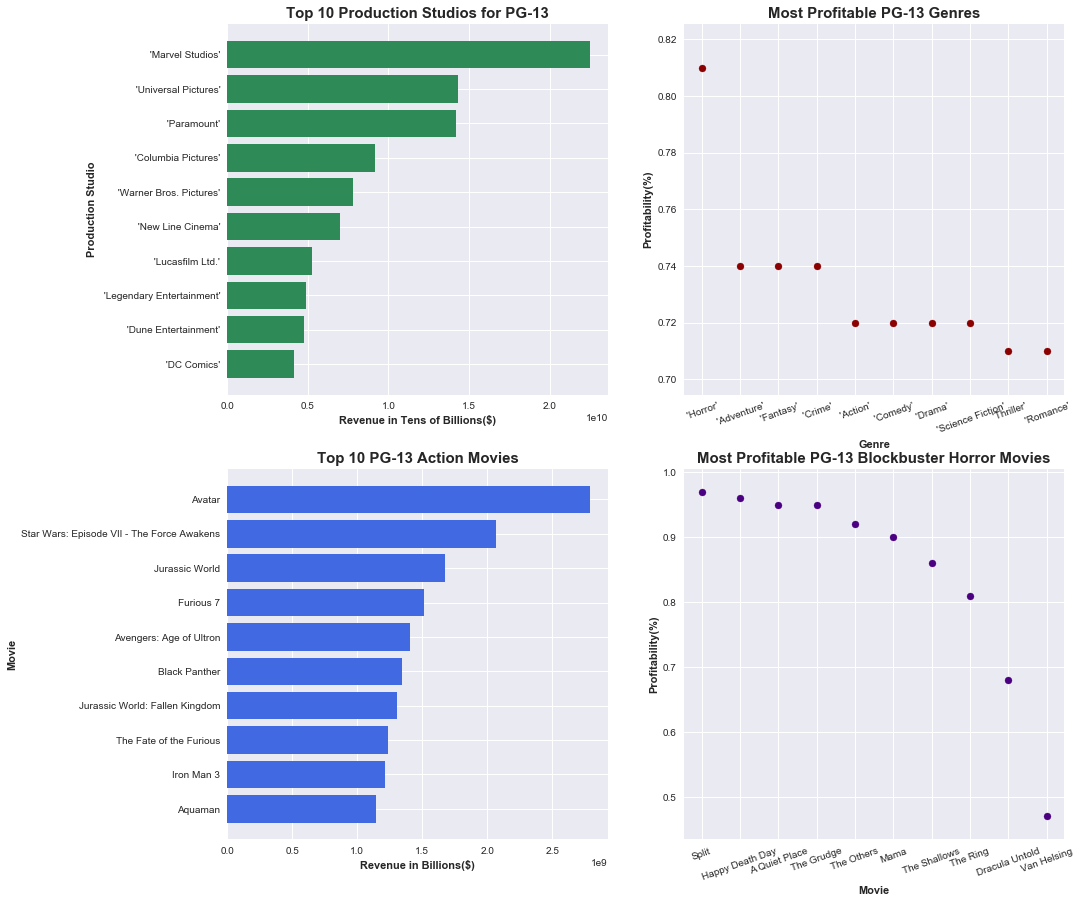

In [389]:
figure, axes = plt.subplots(2,2, figsize=(15,15))

axes[0][0].barh(mpaa_pg13_top['main_production'], mpaa_pg13_top['revenue'], color='seagreen', align='center')
axes[0][0].set_title('Top 10 Production Studios for PG-13', fontsize=(15), fontweight='bold')
axes[0][0].set_xlabel('Revenue in Tens of Billions($)', fontweight='bold')
axes[0][0].set_ylabel('Production Studio', fontweight='bold')
axes[0][0].invert_yaxis()

axes[0][1].scatter(mpaa_pg13_genre['main_genre'],mpaa_pg13_genre['%_Profit'], color='darkred')
axes[0][1].set_title('Most Profitable PG-13 Genres', fontsize=(15), fontweight='bold')
axes[0][1].set_xticklabels(mpaa_pg13_genre['main_genre'], rotation=20)
axes[0][1].set_xlabel('Genre', fontweight='bold')
axes[0][1].set_ylabel('Profitability(%)', fontweight='bold')


axes[1][0].barh(mpaa_pg13_action['Title'],mpaa_pg13_action['revenue'], color='royalblue', align='center')
axes[1][0].set_title('Top 10 PG-13 Action Movies', fontsize=(15), fontweight='bold')
axes[1][0].set_xlabel('Revenue in Billions($)', fontweight='bold')
axes[1][0].set_ylabel('Movie', fontweight='bold')
axes[1][0].invert_yaxis()

axes[1][1].scatter(mpaa_pg13_horror['Title'],mpaa_pg13_horror['%_Profit'], color ='indigo')
axes[1][1].set_title('Most Profitable PG-13 Blockbuster Horror Movies', fontsize=(15), fontweight='bold')
axes[1][1].set_xticklabels(mpaa_pg13_horror['Title'], rotation=20)
axes[1][1].set_xlabel('Movie', fontweight='bold')
axes[1][1].set_ylabel('Profitability(%)', fontweight='bold');

# Created a series of subplots to illustrate the four different charts explained above.
# Each chart dives deeper into the PG-13 category going into production studios, genres, and movie titles
# Utilized matplotlib to create the visualizations and color/formatting